### Introduction

The wine industry has always been an area of fascination for both connoisseurs and researchers. The quality of wine is influenced by a multitude of factors, including the chemical composition of the wine itself. Analyzing and predicting wine quality is not only of interest to sommeliers and winemakers but also to data scientists and machine learning enthusiasts.

In this project, we aim to delve into the world of wine quality prediction using machine learning techniques. We will explore a dataset that provides detailed information about various attributes of both red and white wines, such as fixed acidity, volatile acidity, citric acid, residual sugar, and more. Our primary objective is to build a predictive model that can estimate the quality of wine based on these attributes.

Throughout this endeavor, we will follow a structured approach, including data collection, data preprocessing, model selection, and evaluation. Additionally, we will investigate which factors have the most significant influence on wine quality, shedding light on the critical aspects that contribute to the overall perception of a wine's excellence.

By the end of this project, we hope to have not only a reliable wine quality prediction model but also valuable insights into what makes a great wine, all through the lens of data science and machine learning. Let's embark on this journey into the fascinating world of wine and data.

### Summary of the chemical composition influencing the quality of red wine

![Alt Text](wine.png)

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

#### Data Exploration

In [3]:
import pandas as pd

# Read the original CSV file
df = pd.read_csv('winequality-red.csv', sep=';')

# Save the DataFrame 'df' to a CSV file
#df.to_csv('output_file.csv', index=False)


In [4]:
# Display the first few rows of the dataset to get an overview
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Calculate the number of missing values in each column
missing_values = df.isna().sum().sort_values(ascending=False)

# Filter columns with non-zero missing values
columns_with_missing_values = missing_values.loc[lambda x: x > 0]

# Display the columns with missing values
columns_with_missing_values

Series([], dtype: int64)

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the DataFrame using the scaler
df_normalized = scaler.fit_transform(df)

# Convert df_normalized into a new DataFrame with column names
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# Display summary statistics of the normalized data
normalized_stats = df_normalized.describe()
normalized_stats

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.599000e+03      1.599000e+03  1.599000e+03    1.599000e+03   
mean    3.435512e-16      1.699704e-16  4.335355e-16   -1.905223e-16   
std     1.000313e+00      1.000313e+00  1.000313e+00    1.000313e+00   
min    -2.137045e+00     -2.278280e+00 -1.391472e+00   -1.162696e+00   
25%    -7.007187e-01     -7.699311e-01 -9.293181e-01   -4.532184e-01   
50%    -2.410944e-01     -4.368911e-02 -5.636026e-02   -2.403750e-01   
75%     5.057952e-01      6.266881e-01  7.652471e-01    4.341614e-02   
max     4.355149e+00      5.877976e+00  3.743574e+00    9.195681e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.599000e+03         1.599000e+03          1.599000e+03  1.599000e+03   
mean   3.836136e-16         1.432042e-16          1.289532e-16 -3.482795e-14   
std    1.000313e+00         1.000313e+00          1.000313e+00  1.000313e+00   
min   -1.603945e+00        -1.422500e+00         -1.230584e+00 -3.538731e+00   
25%   -3.712290e-01        -8.487156e-01         -7.440403e-01 -6.077557e-01   
50%   -1.799455e-01        -1.793002e-01         -2.574968e-01  1.760083e-03   
75%    5.384542e-02         4.901152e-01          4.723184e-01  5.768249e-01   
max    1.112703e+01         5.367284e+00          7.375154e+00  3.680055e+00   

                 pH     sulphates       alcohol       quality  
count  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03  
mean   3.002879e-15  7.639596e-16  9.437243e-16 -8.051373e-16  
std    1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00  
min   -3.700401e+00 -1.936507e+00 -1.898919e+00 -3.265165e+00  
25%   -6.551405e-01 -6.382196e-01 -8.663789e-01 -7.878226e-01  
50%   -7.212705e-03 -2.251281e-01 -2.093081e-01  4.508484e-01  
75%    5.759223e-01  4.240158e-01  6.354971e-01  4.508484e-01  
max    4.528282e+00  7.918677e+00  4.202453e+00  2.928190e+00

In [10]:
# Get the column names of the DataFrame
df_normalized.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
for col in df_normalized.columns:
    new_col = col.replace(' ', '_')  # Replace spaces with underscores
    df_normalized.rename(columns={col: new_col}, inplace=True)

# Now, all columns have spaces replaced with underscores
df_normalized

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol   quality  
0     -0.579207 -0.960246 -0.787823  
1      0.128950 -0.584777 -0.787823  
2     -0.048089 -0.584777 -0.787823  
3     -0.461180 -0.584777  0.450848  
4     -0.579207 -0.960246 -0.787823  
...         ...       ...       ...  
1594  -0.461180  0.072294 -0.787823  
1595   0.601055  0.729364  0.450848  
1596   0.542042  0.541630  0.450848  
1597   0.305990 -0.209308 -0.787823  
1598   0.010924  0.541630  0.450848  

[1599 rows x 12 columns]

### Data Visualization

### Correlation

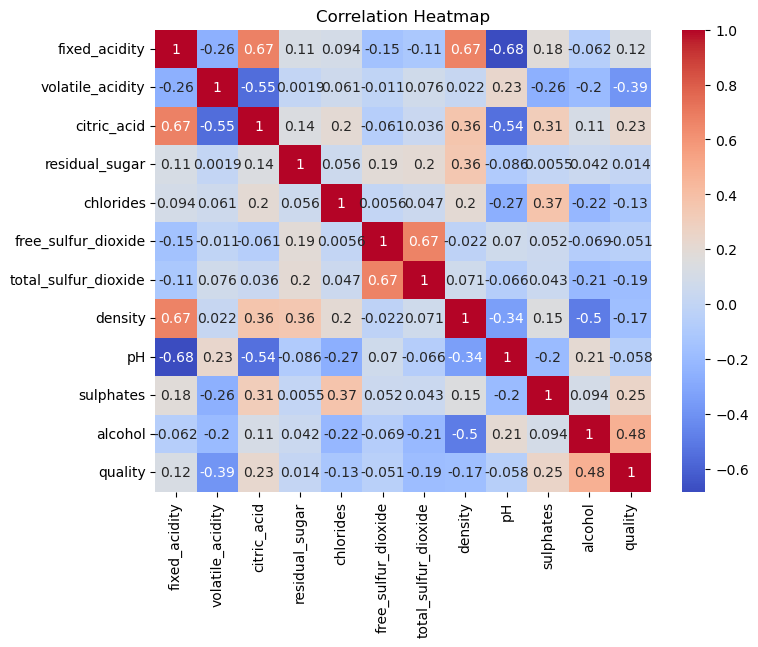

In [12]:
# Correlation heatmap
plt.figure(figsize=(8, 6))

# Calculate the correlation matrix for the numerical columns
correlation_matrix = df_normalized.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

We can observe a strong positive correlation between the free_sulfur_dioxide, total_sulfur_oxide, alcohol and quality. As expected, this correlation is indicative of certain factors that can influence wine quality.

### Scatter plot

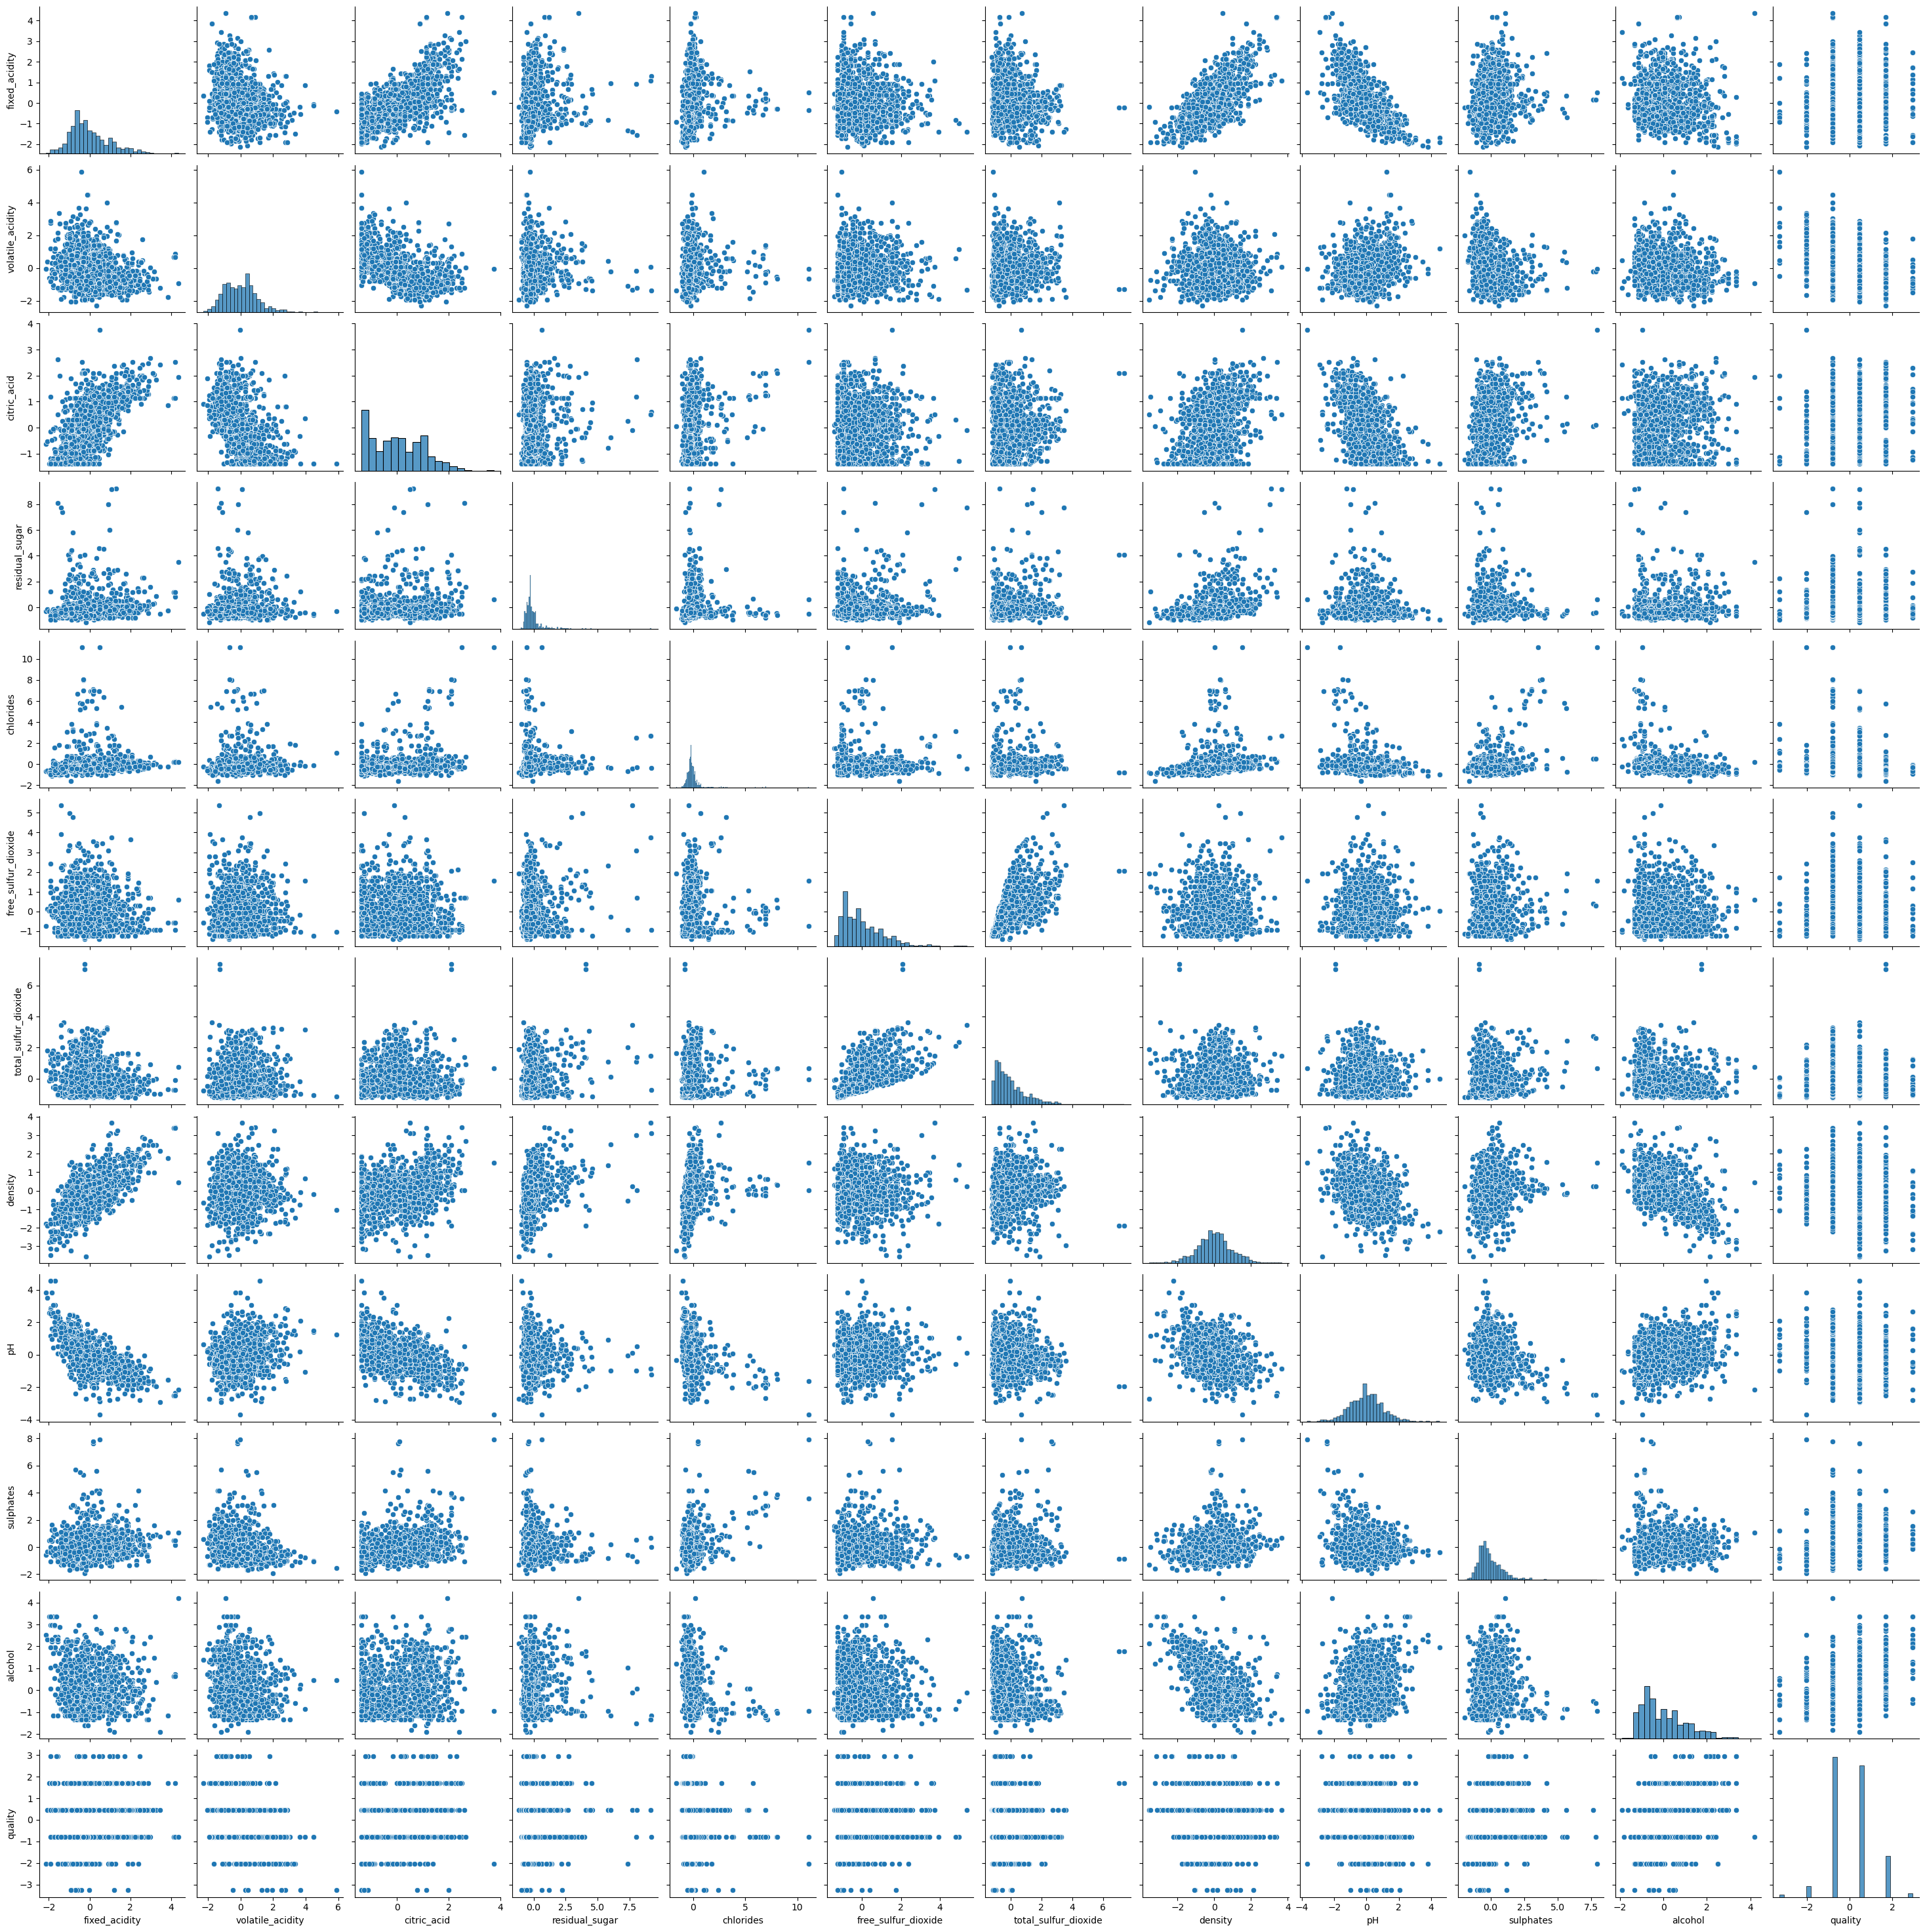

In [13]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(df_normalized.iloc[:, :])

### Frequency of Wine Quality

Text(0.5, 1.0, 'Frequency of Wine Quality')

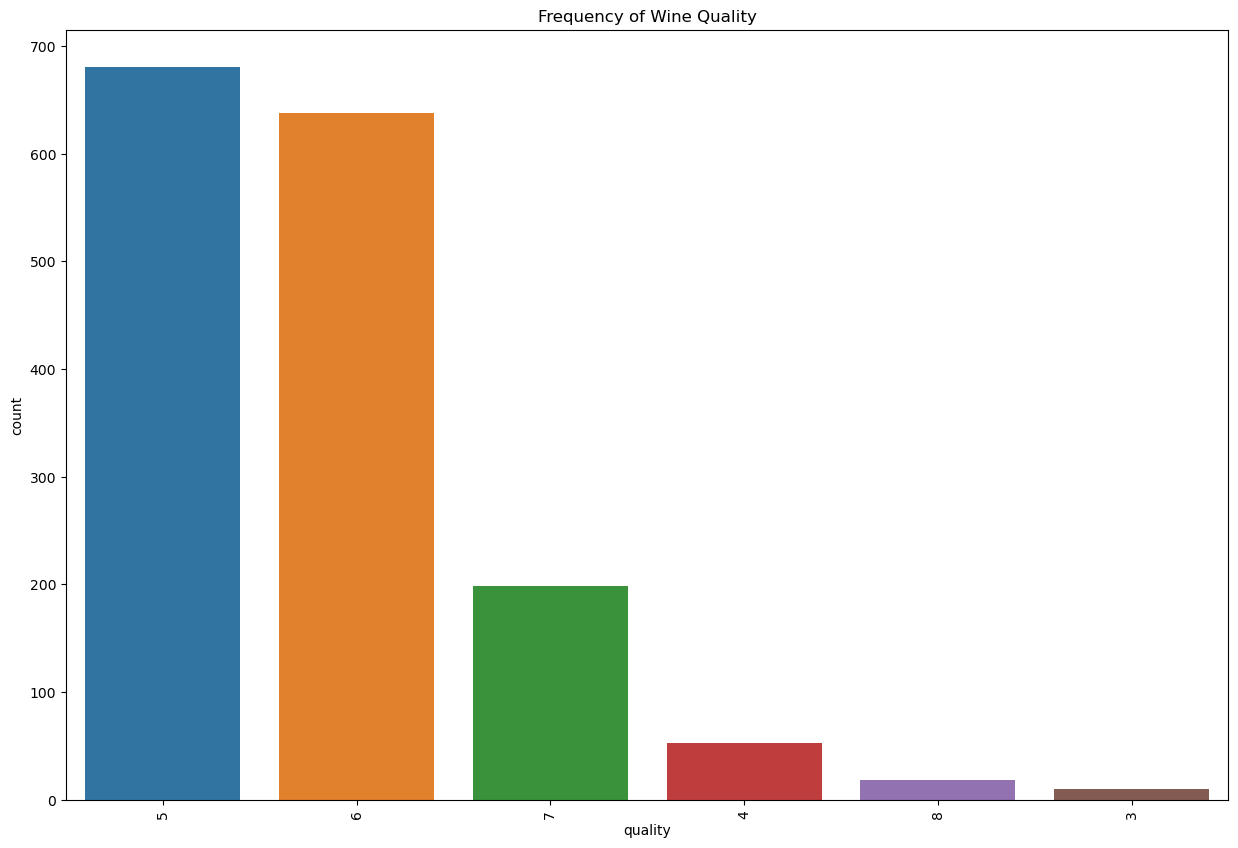

In [14]:
#genre frequency
plt.figure(figsize=(15, 10))

# Define the order of the quality ratings
order = ["Poor (3)", "Below Average (4)", "Average (5)", "Good (6)", "Very Good (7)", "Excellent (8)"]

sns.countplot(x="quality", data=df, order = df['quality'].value_counts().index)
plt.xticks(rotation=90)

# Set plot title
plt.title("Frequency of Wine Quality")



### Quality Ratings

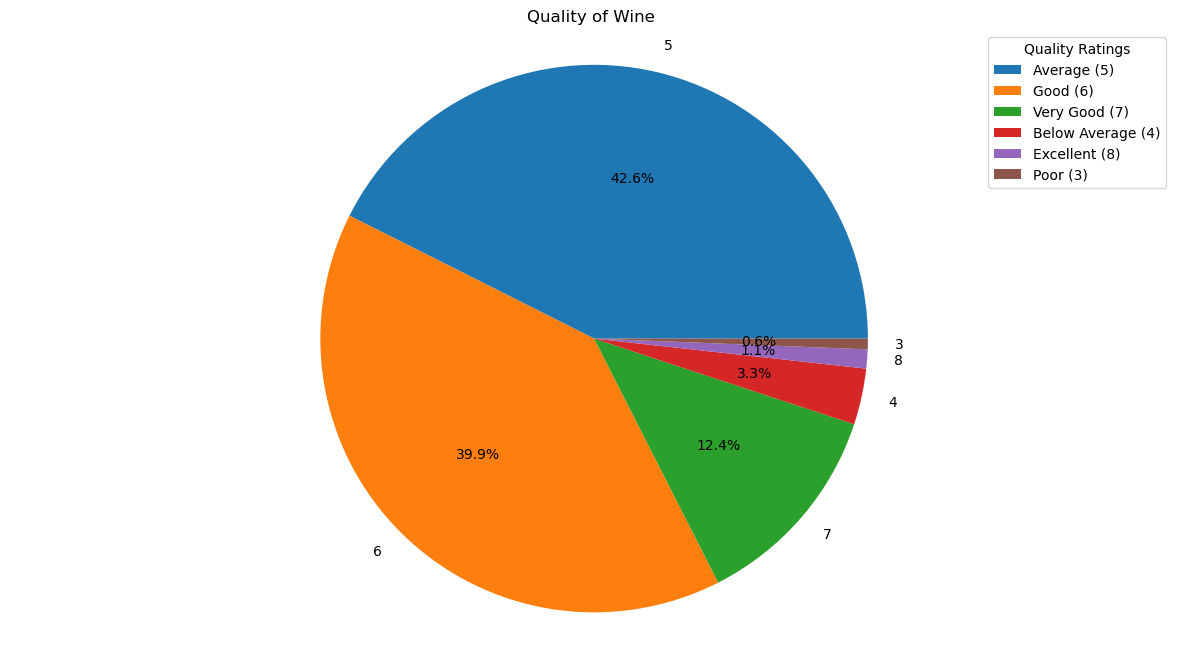

In [15]:
import matplotlib.pyplot as plt

# Calculate the wine quality counts
wine_quality = df['quality'].value_counts()

# Define the order of the quality ratings
order = ["Average (5)", "Good (6)", "Very Good (7)","Below Average (4)","Excellent (8)","Poor (3)"]

# Create a pie chart
plt.figure(figsize=(15, 8))
plt.pie(wine_quality.values, labels=wine_quality.index, autopct='%1.1f%%')

# Set aspect ratio to equal to ensure a circular pie chart
plt.axis('equal')

# Add a legend with custom labels
plt.legend(labels=order, loc="best", title="Quality Ratings")

# Set plot title
plt.title('Quality of Wine')

# Show the plot
plt.show()


### Histogram Distribution

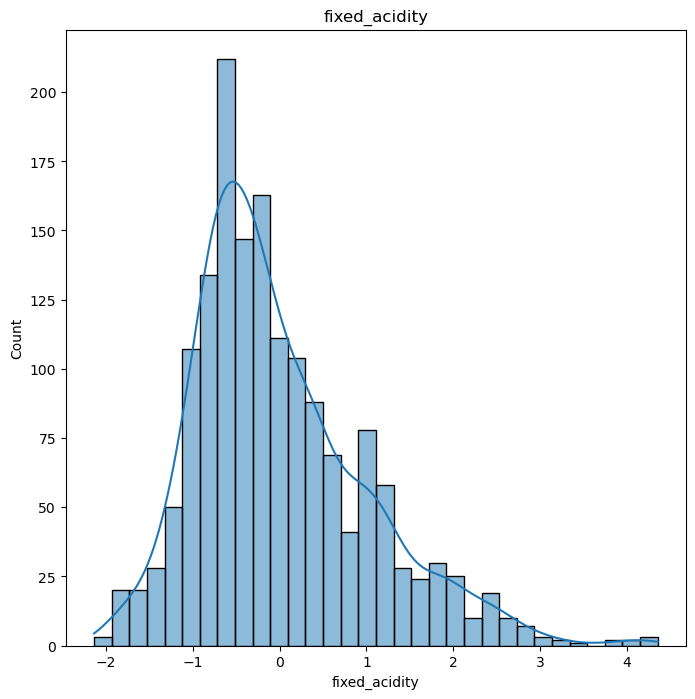

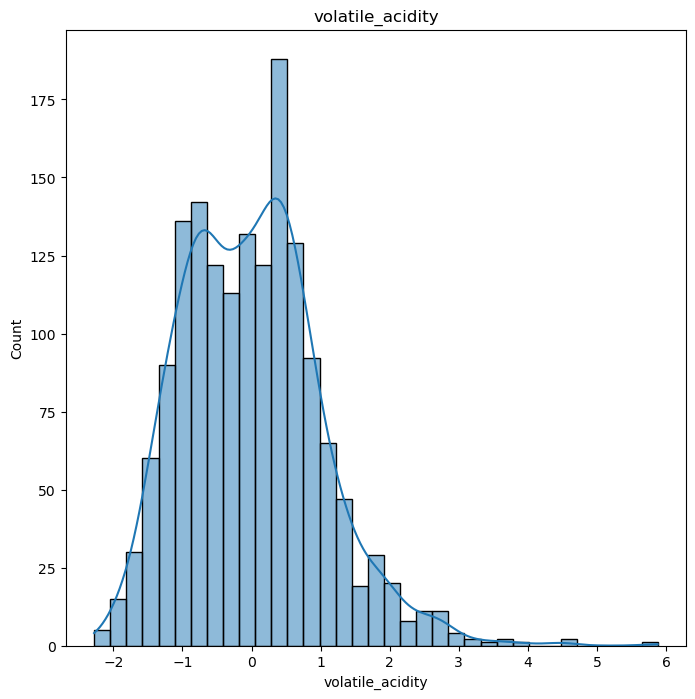

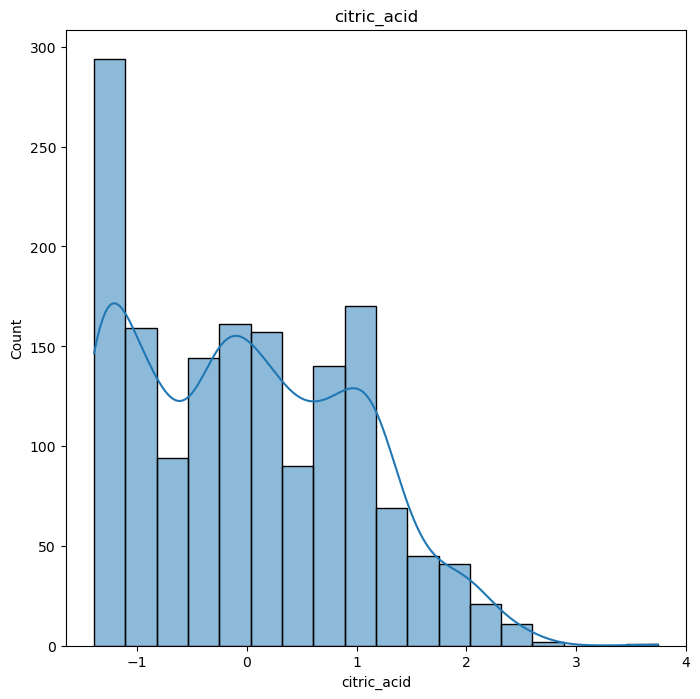

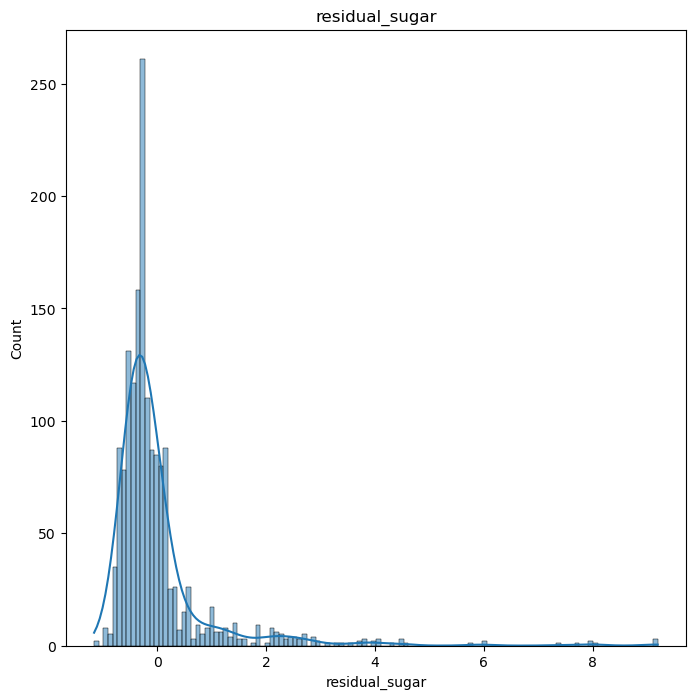

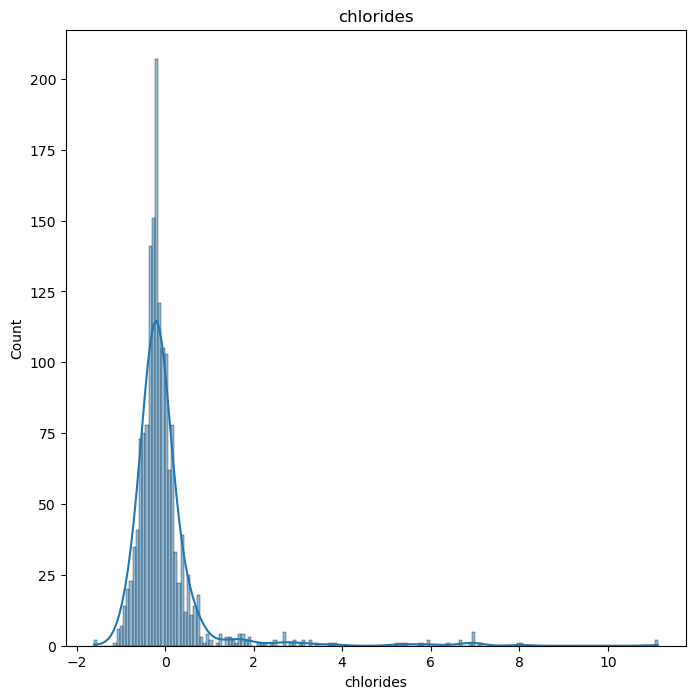

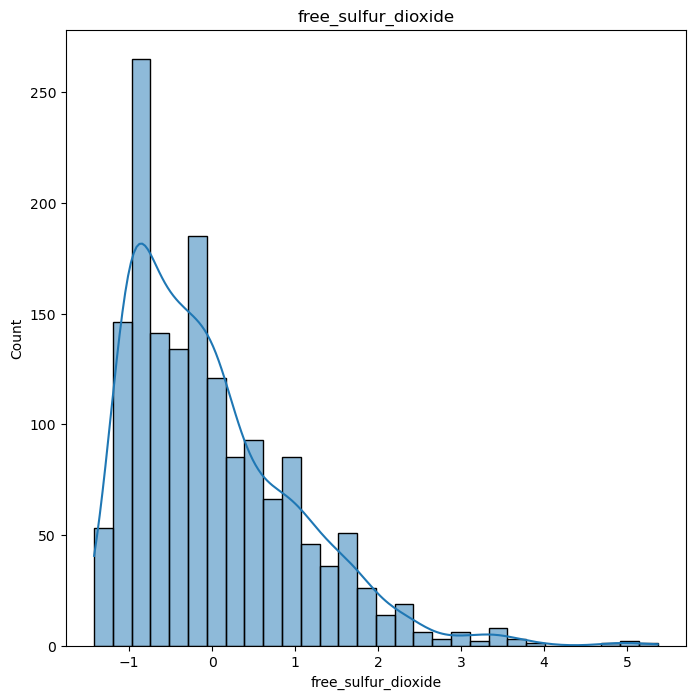

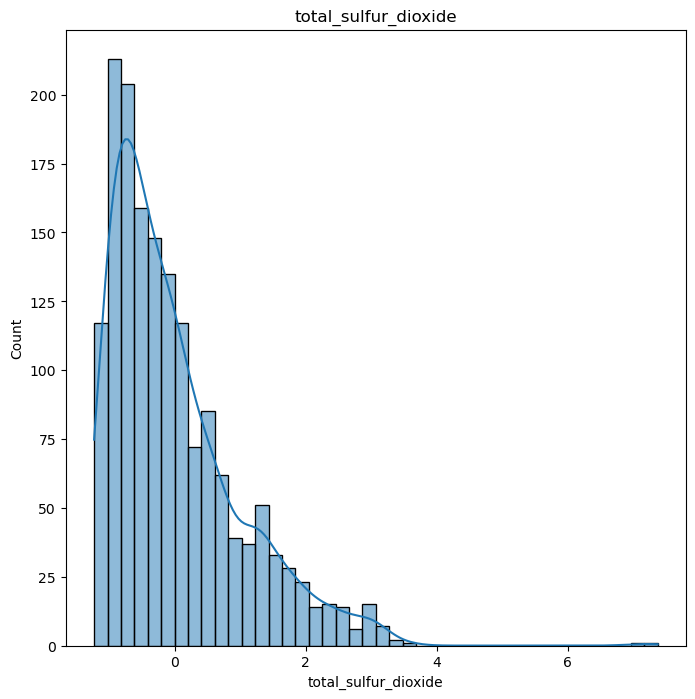

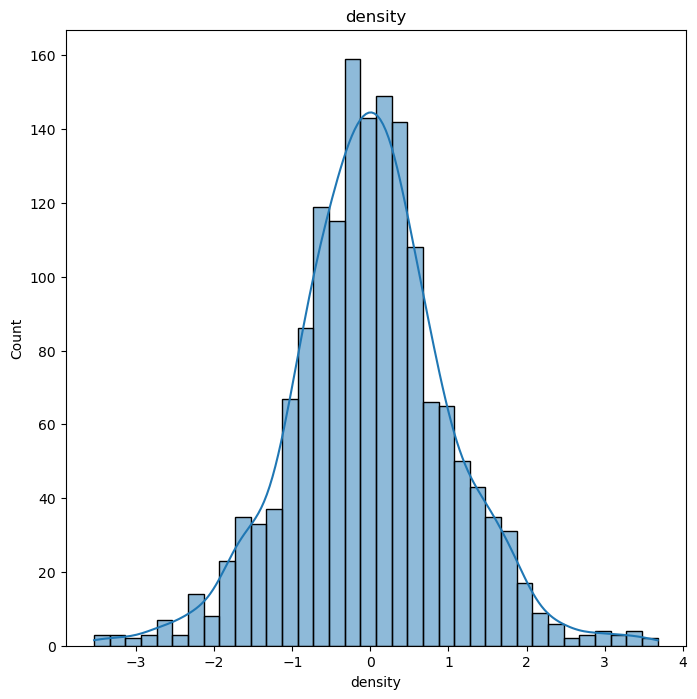

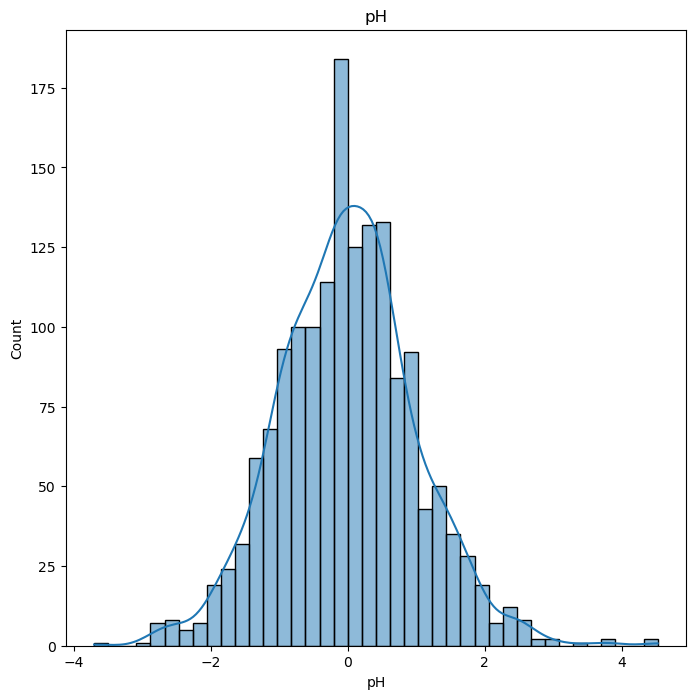

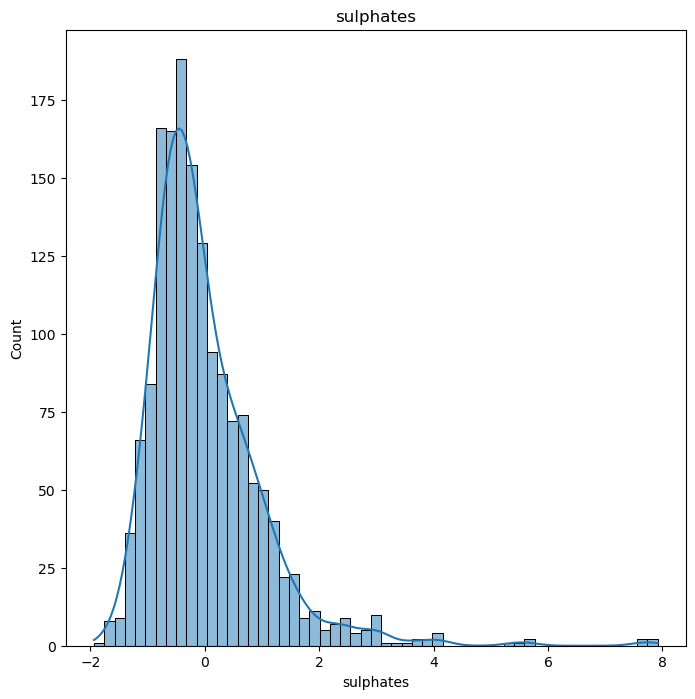

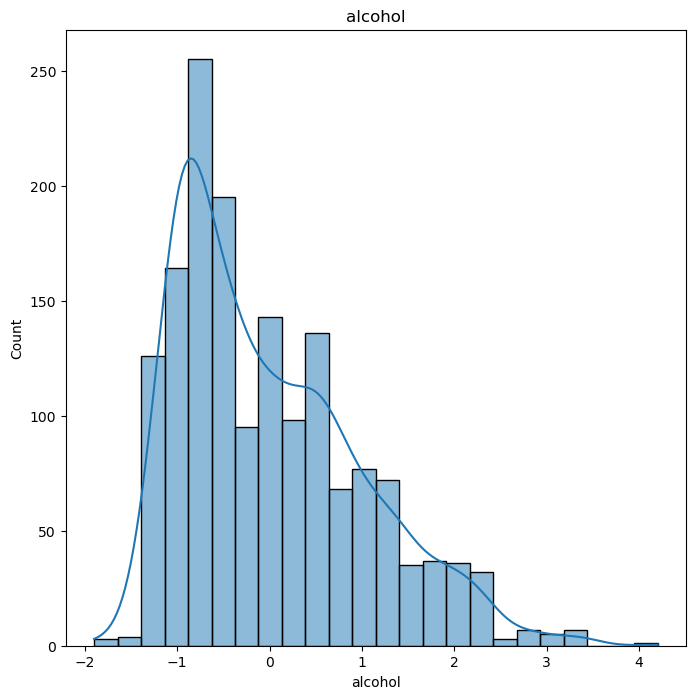

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to create histograms for
columns_to_plot = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Loop through the columns and create histograms with KDE
for column in columns_to_plot:
    plt.figure(figsize=(8,8))
    sns.histplot(data=df_normalized, x=column, kde=True)
    plt.title(column)
    plt.show()


In [17]:
import scipy.stats as stats
kurtosis_value = stats.kurtosis(df_normalized)
print("Kurtosis:", kurtosis_value)

Kurtosis: [ 1.12485634  1.21796339 -0.79028252 28.52443782 41.58170804  2.01349
  3.79417177  0.9274108   0.80067144 11.67988411  0.19565438  0.29203114]


| Feature              | Value         |
|----------------------|---------------|
| Fixed Acidity        | 1.12485634    |
| Volatile Acidity     | 1.21796339    |
| Citric Acid          | -0.79028252   |
| Residual Sugar       | 28.52443782   |
| Chlorides            | 41.58170804   |
| Free Sulfur Dioxide  | 2.01349       |
| Total Sulfur Dioxide | 3.79417177    |
| Density              | 0.9274108     |
| pH                   | 0.80067144    |
| Sulphates            | 11.67988411   |
| Alcohol              | 0.19565438    |
| Quality              | 0.29203114    |


Features with high positive kurtosis values (greater than 3) may have heavy tails and more outliers.
Features with negative kurtosis values (less than 3) may have light tails and fewer outliers.

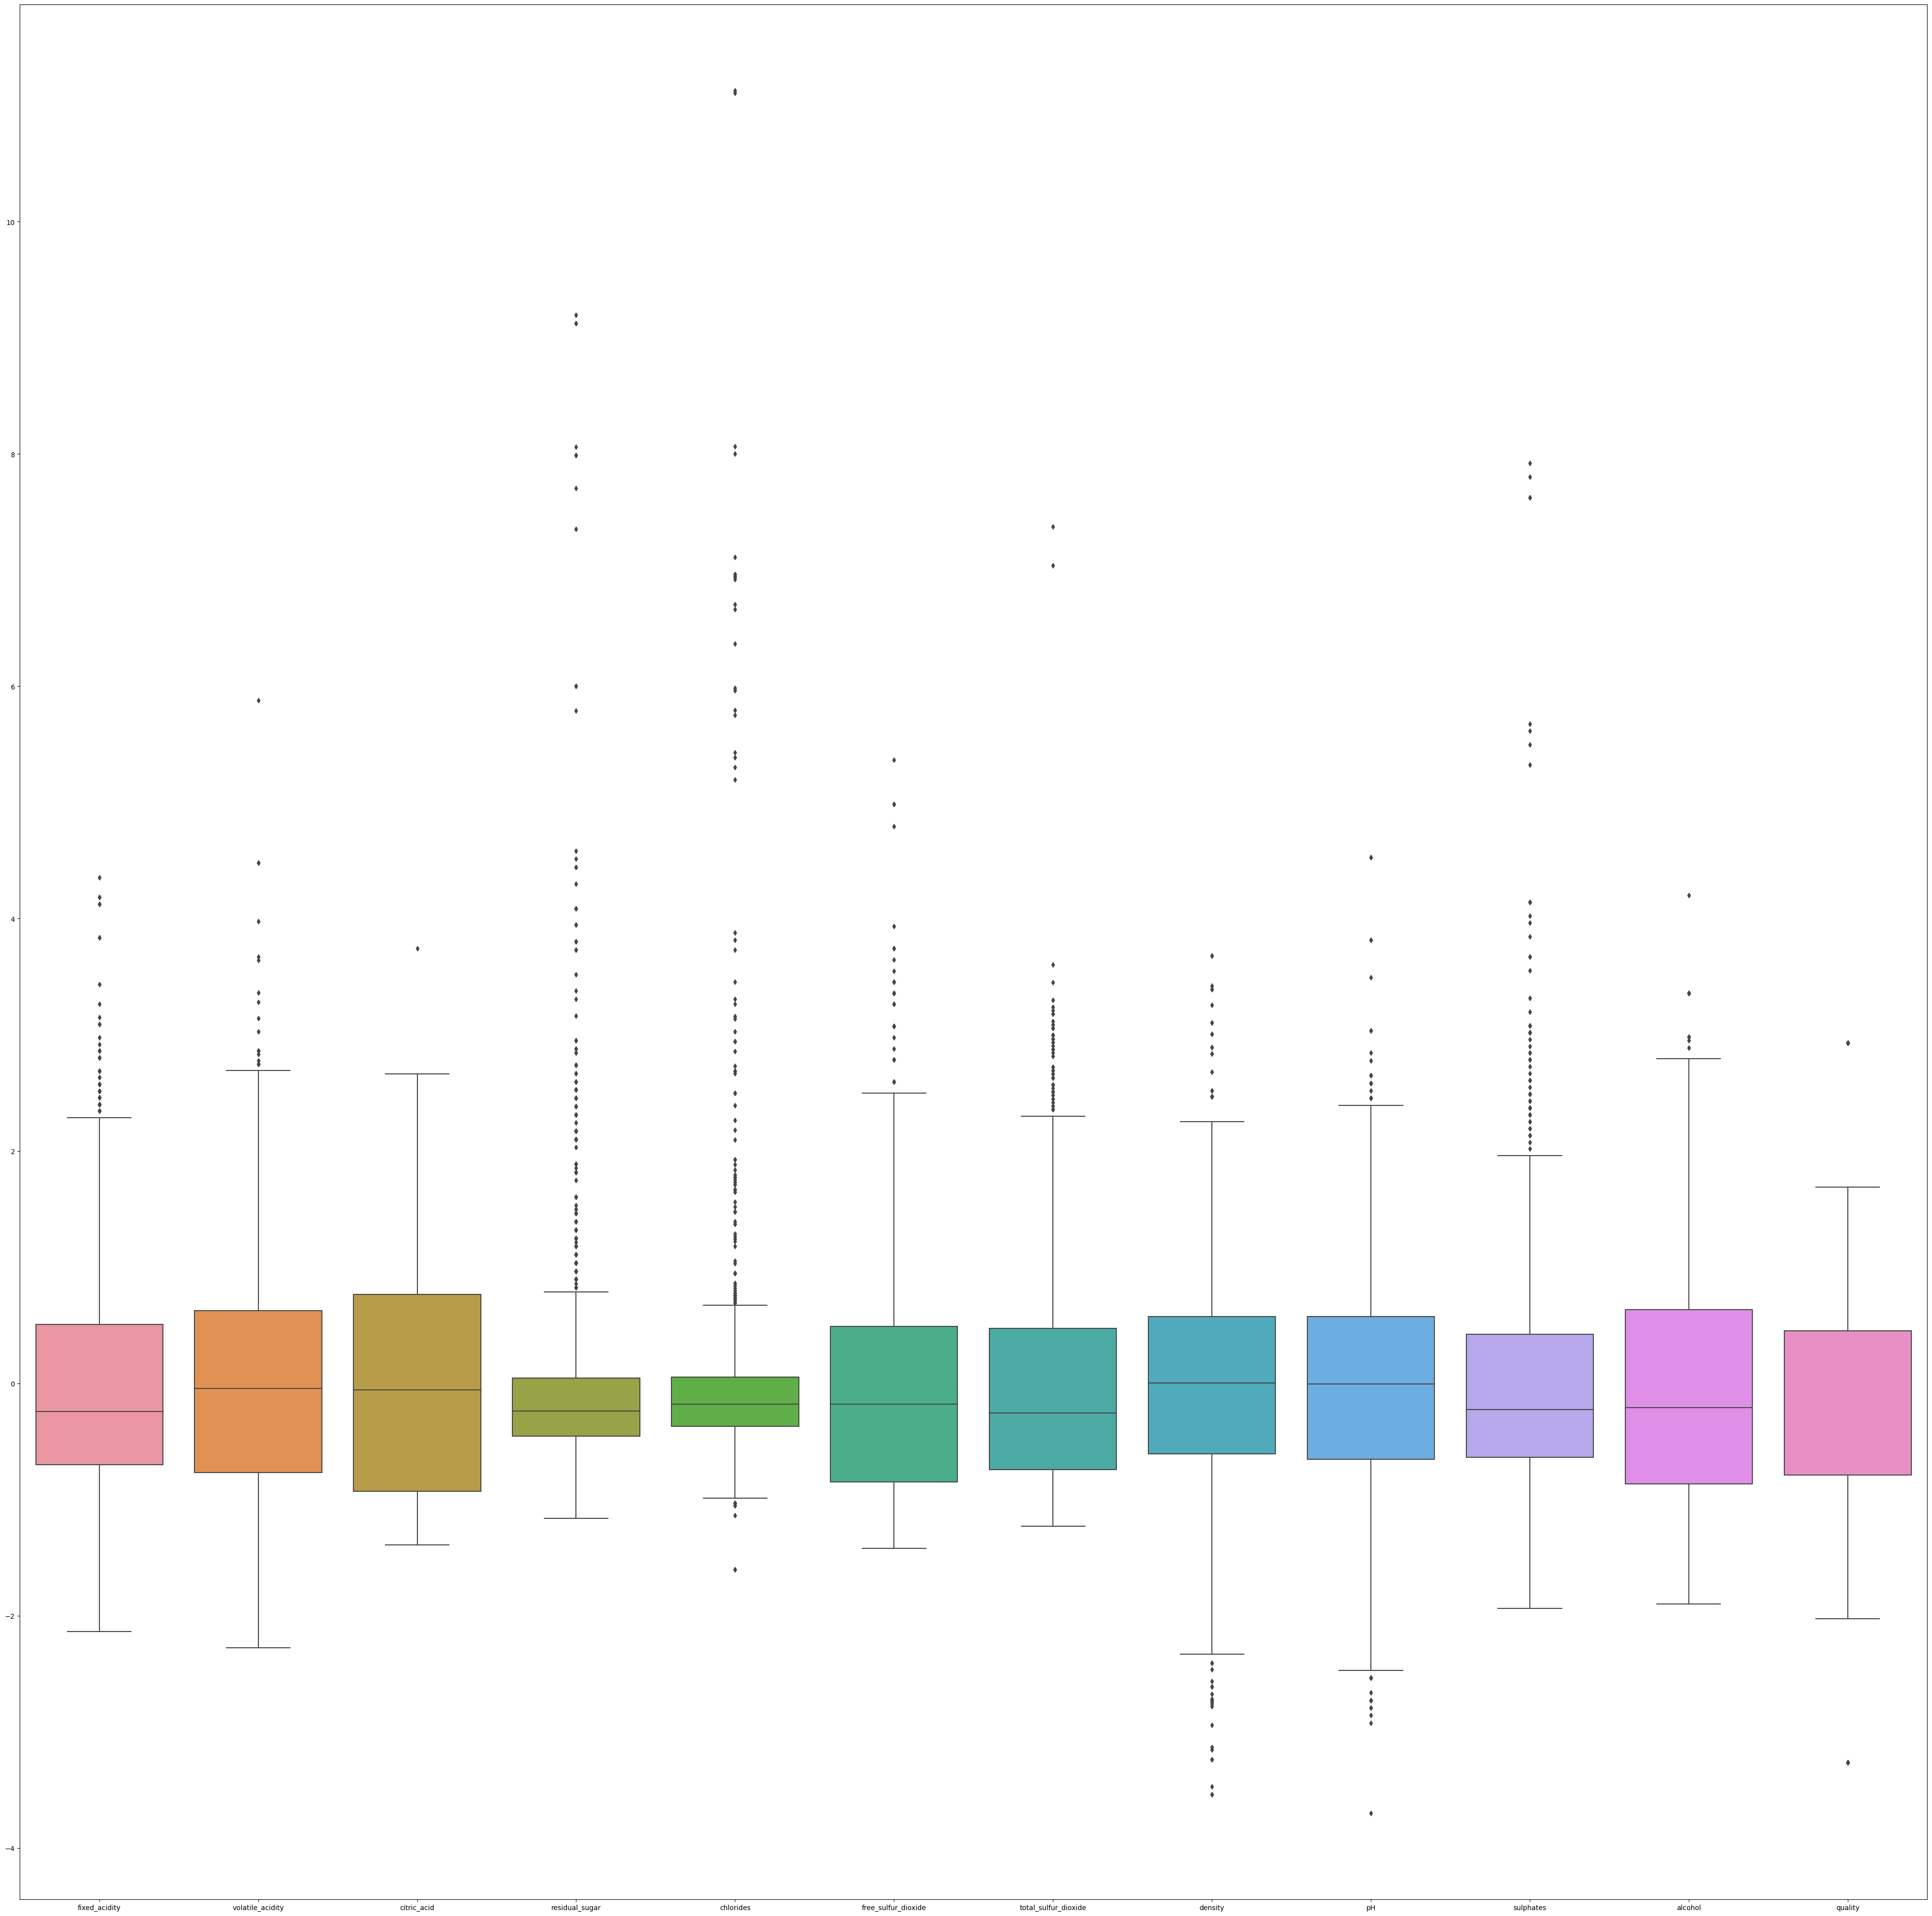

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,50))
sns.boxplot(data=df_normalized)
plt.show()


In [19]:

import scipy.stats as stats

# Define the lower and upper percentiles for winsorization (1% and 99%)
lower_percentile = 10
upper_percentile = 20

# Create a copy of the DataFrame to store winsorized values
df_winsorized = df_normalized.copy()

# Iterate through each column and winsorize the data
for column in df_winsorized.columns:
    winsorized_values = stats.mstats.winsorize(df_winsorized[column], limits=(lower_percentile / 100, upper_percentile / 100))
    df_winsorized[column] = winsorized_values

# Now, df_winsorized contains the winsorized data
df_winsorized.head(1400)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         -0.528360          0.738418    -1.340122       -0.453218  -0.243707   
1         -0.298547          0.738418    -1.340122        0.043416   0.138860   
2         -0.298547          0.738418    -1.186070       -0.169427   0.096353   
3          0.793060         -1.216849     0.970649       -0.453218  -0.264960   
4         -0.528360          0.738418    -1.340122       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1395       0.161077          0.738418    -0.877968       -0.595114   0.096353   
1396       0.218530          0.738418    -0.877968       -0.595114   0.053845   
1397      -0.585813          0.347364    -0.056360       -0.382271  -0.158692   
1398      -0.758172          0.403229    -0.775267       -0.240375  -0.094931   
1399      -0.643266          0.738418    -1.340122       -0.240375  -0.413736   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  0.770301   
1                0.777007              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  0.770301   
...                   ...                   ...       ...       ...   
1395            -1.039977             -0.987312  0.372770 -0.007213   
1396            -1.039977             -0.987312  0.372770 -0.007213   
1397             0.107592              0.685181 -0.480552 -0.201591   
1398            -0.274931             -0.561586 -0.077742  0.770301   
1399            -0.561823             -0.683222 -0.607756  0.705508   

      sulphates   alcohol   quality  
0     -0.579207 -0.960246 -0.787823  
1      0.128950 -0.584777 -0.787823  
2     -0.048089 -0.584777 -0.787823  
3     -0.461180 -0.584777  0.450848  
4     -0.579207 -0.960246 -0.787823  
...         ...       ...       ...  
1395  -0.048089 -0.819445  0.450848  
1396  -0.048089 -0.819445 -0.787823  
1397  -0.815259 -0.490910 -0.787823  
1398  -0.225128 -0.209308  0.450848  
1399   0.365003  0.635497  0.450848  

[1400 rows x 12 columns]

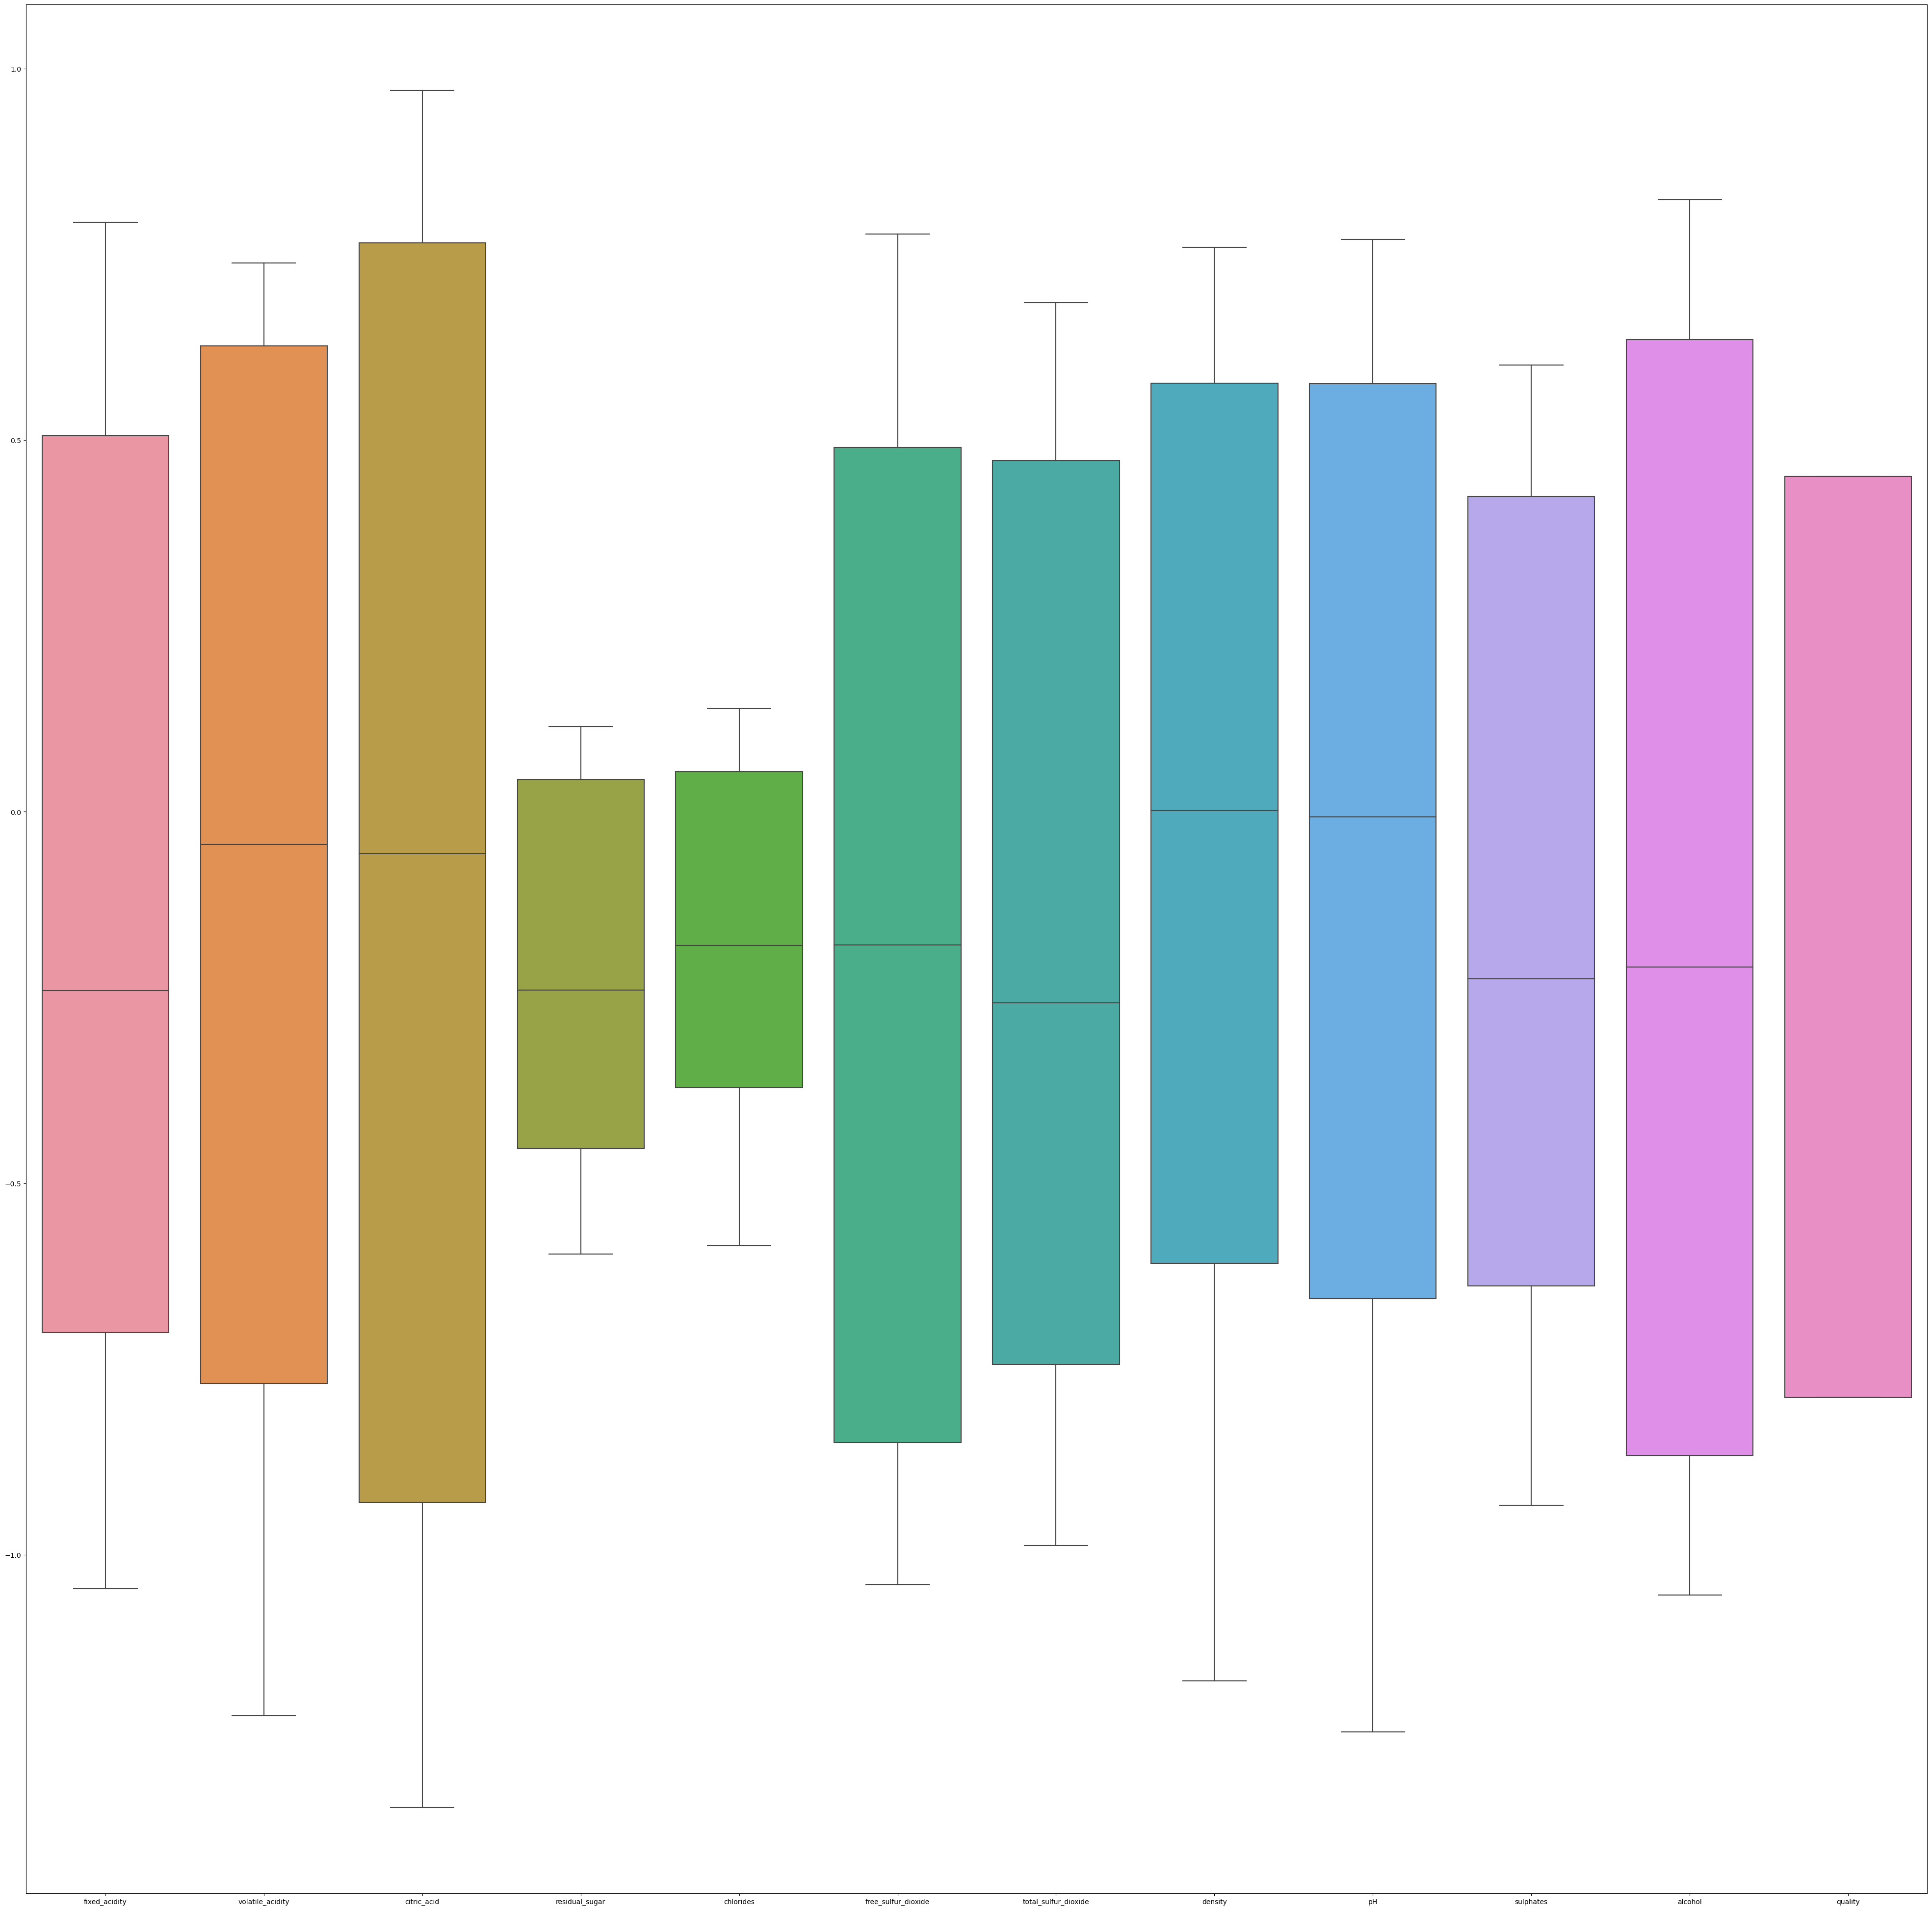

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,50))
sns.boxplot(data=df_winsorized)
plt.show()

In [21]:
import scipy.stats as stats
kurtosis_value = stats.kurtosis(df_winsorized)
print("Kurtosis:", kurtosis_value)

Kurtosis: [-1.36947161 -1.39859122 -1.42704203 -1.39855521 -1.1806725  -1.43101641
 -1.43567426 -1.20993706 -1.24021131 -1.3754663  -1.53674598 -1.98063101]


##### Negative kurtosis values often suggest that the distribution has lighter tails and is less peaked at the center compared to a normal distribution. In other words, the data has fewer extreme values and is more spread out towards the tails.

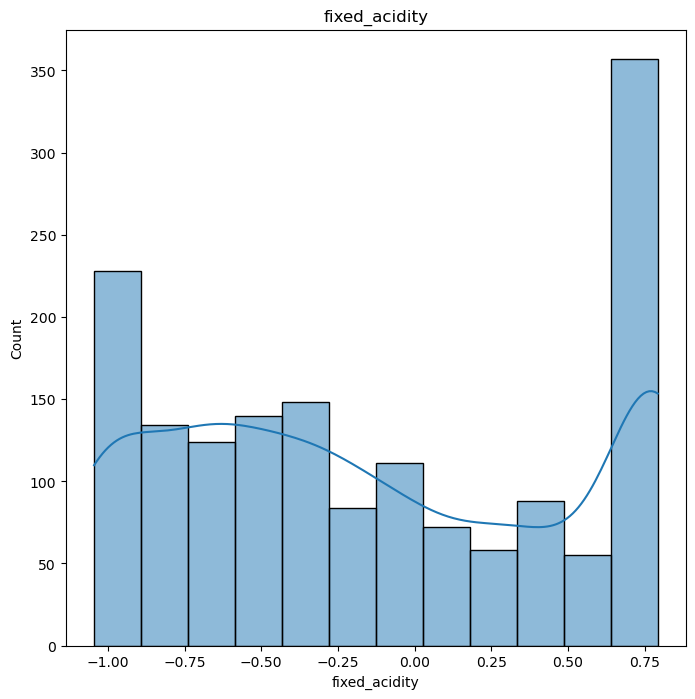

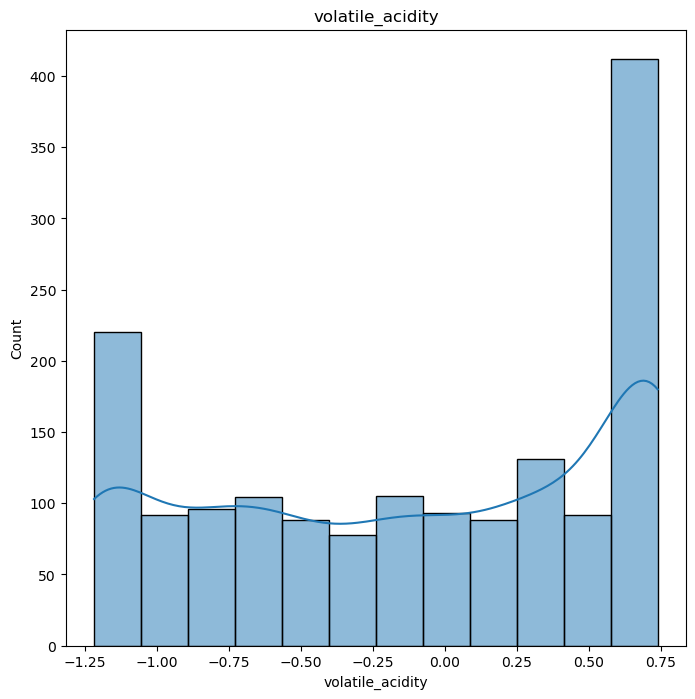

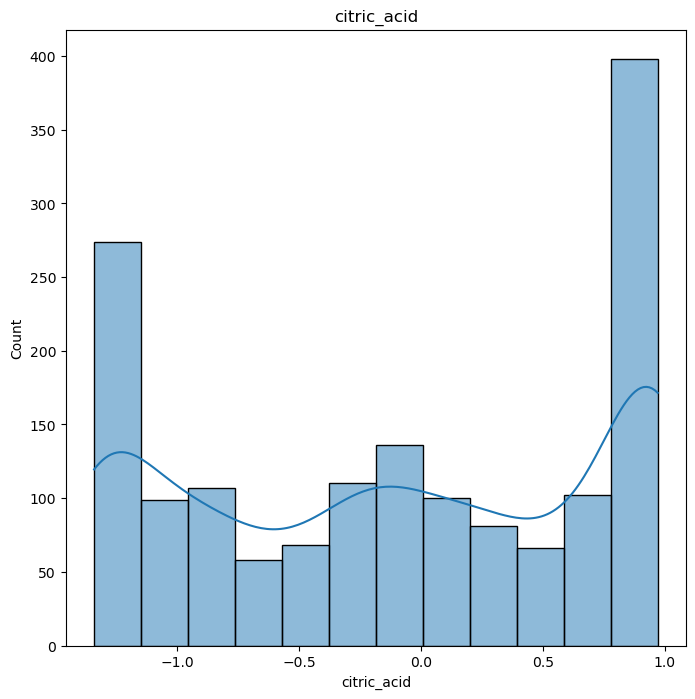

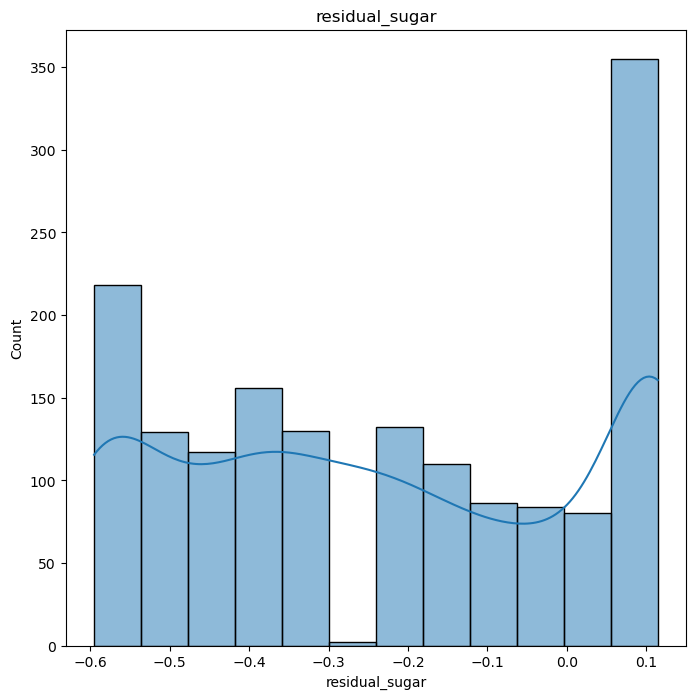

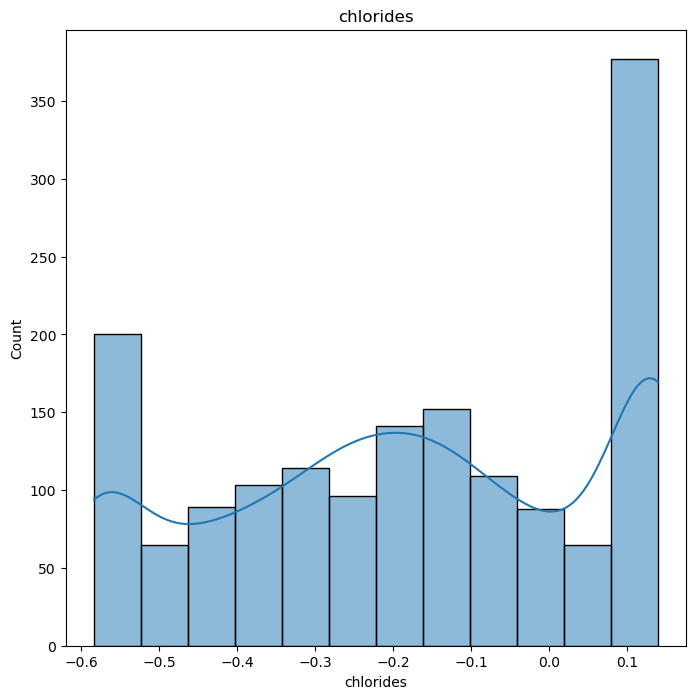

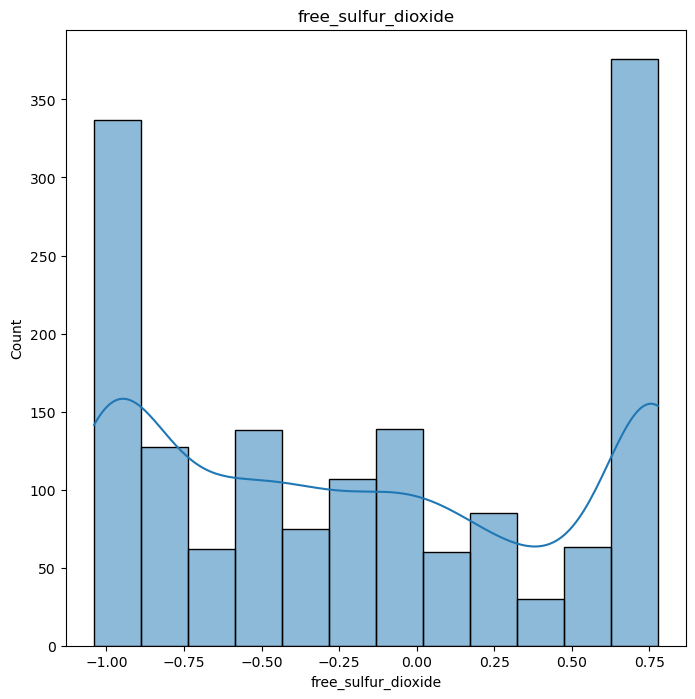

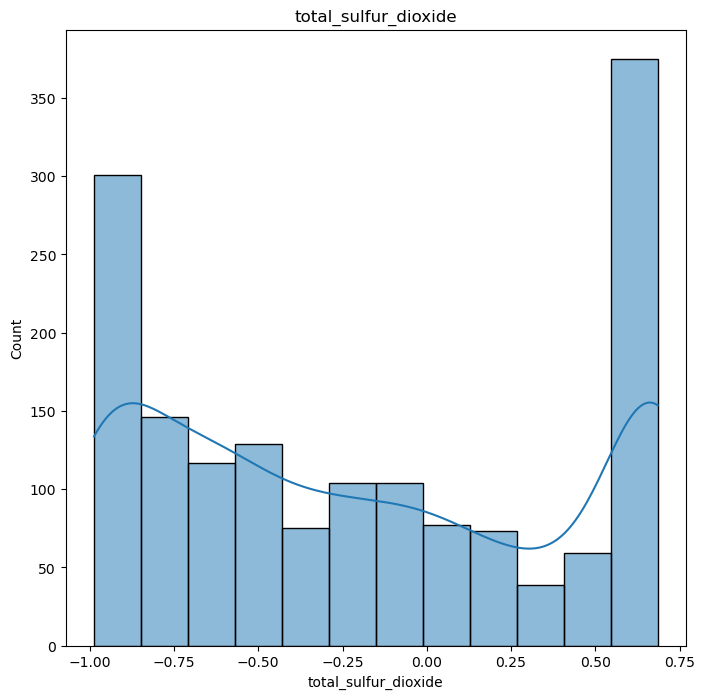

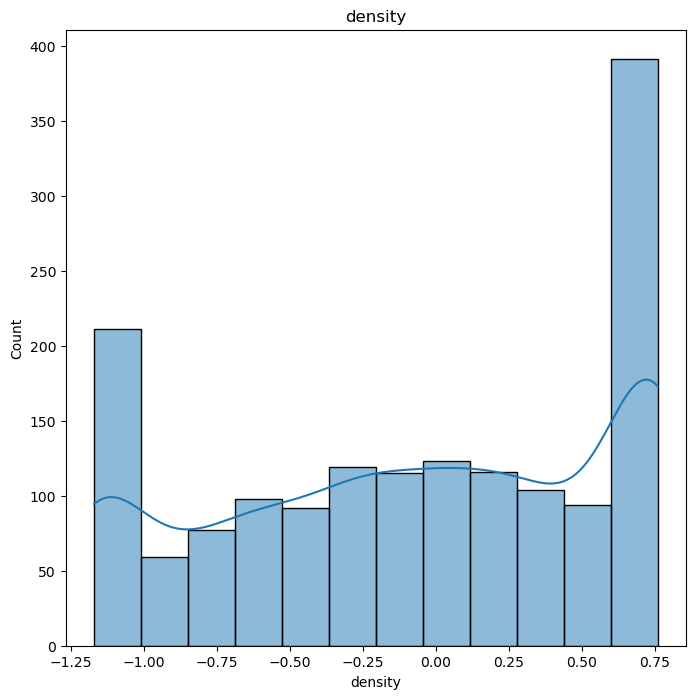

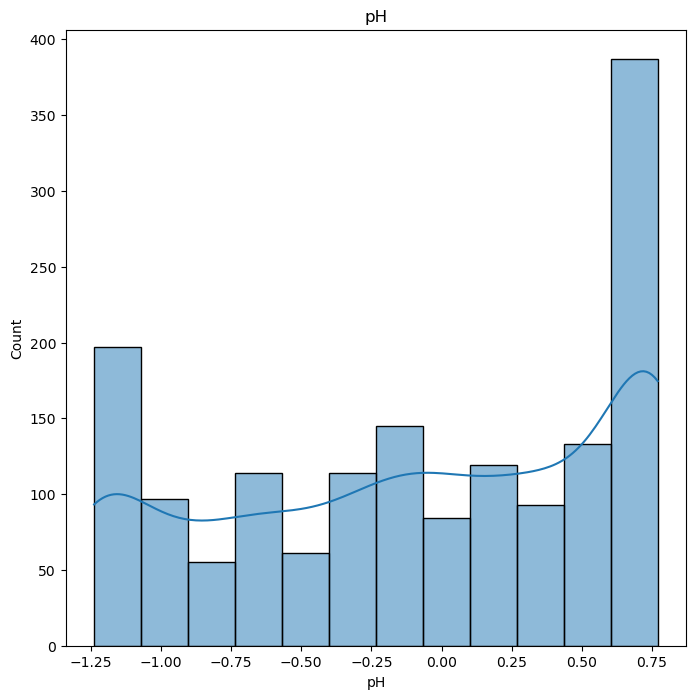

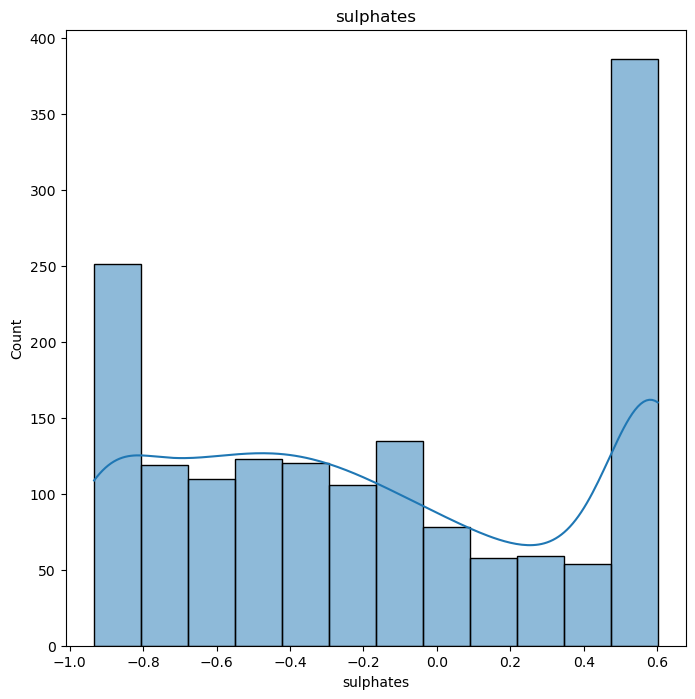

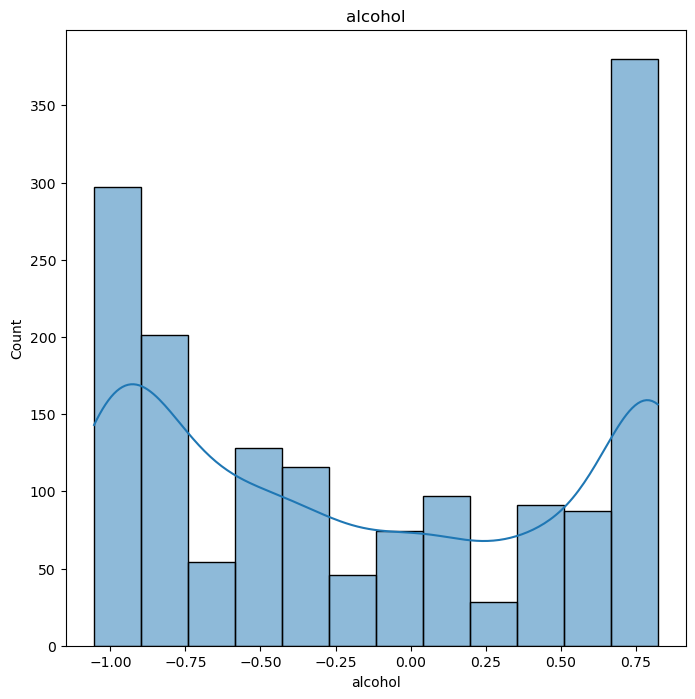

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to create histograms for
columns_to_plot = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Loop through the columns and create histograms with KDE
for column in columns_to_plot:
    plt.figure(figsize=(8,8))
    sns.histplot(data=df_winsorized, x=column, kde=True)
    plt.title(column)
    plt.show()



In [23]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide + total_sulfur_dioxide+density+pH+sulphates+alcohol', data = df_winsorized).fit() # regression model

# Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     63.33
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          4.06e-117
Time:                        19:16:58   Log-Likelihood:                -1208.0
No. Observations:                1599   AIC:                             2440.
Df Residuals:                    1587   BIC:                             2504.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0968      0.022     -4.396      0.000      -0.140      -0.054
fixed_acidity            0.0793      0.040      1.959      0.050   -9.73e-05       0.159
volatile_acidity        -0.1880      0.027     -7.085      0.000      -0.240      -0.136
citric_acid             -0.0970      0.027     -3.536      0.000      -0.151      -0.043
residual_sugar           0.0224      0.064      0.349      0.727      -0.104       0.148
chlorides               -0.0840      0.061     -1.386      0.166      -0.203       0.035
free_sulfur_dioxide      0.0626      0.032      1.967      0.049       0.000       0.125
total_sulfur_dioxide    -0.1290      0.036     -3.548      0.000      -0.200      -0.058
density                 -0.0346      0.039     -0.876      0.381      -0.112       0.043
pH                      -0.0224      0.029     -0.784      0.433      -0.078       0.034
sulphates                0.2503      0.027      9.200      0.000       0.197       0.304
alcohol                  0.2704      0.029      9.227      0.000       0.213       0.328
==============================================================================
Omnibus:                      124.172   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.026
Skew:                           0.059   Prob(JB):                     7.48e-10
Kurtosis:                       2.215   Cond. No.                         7.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
wine_train, wine_test = train_test_split(df_winsorized, test_size = 0.2) # 20% test data


In [25]:
# preparing the model on train data 
model_train = smf.ols("quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol", data = wine_train).fit()



In [26]:
# prediction on test data set 
test_pred = model_train.predict(wine_test)



In [27]:
# test residual values 
test_resid =wine_test.quality-test_pred
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse


0.5253647947500751

In [28]:
#test residual values
correctness_test = 100-test_rmse 
correctness_test

99.47463520524992

In [29]:

# train_data prediction
train_pred = model_train.predict(wine_train)


In [30]:
# train residual values 
train_resid  = train_pred - wine_train.quality
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse


0.513056110521249

In [31]:
#train residual values
correctness_train = 100-train_rmse 
correctness_train

99.48694388947875

It looks like you mentioned that your test and train data accuracy is 99.35%, which is quite high and indicates that your machine learning model is performing very well on the test data. High accuracy suggests that your model is making accurate predictions on unseen data.

However, it's essential to consider other factors as well, depending on the specific problem you're working on. Accuracy is just one metric, and it may not be the only metric that matters. Depending on your problem, you might want to look at other metrics like precision, recall, F1-score, or consider the balance between false positives and false negatives.

Additionally, it's crucial to ensure that your dataset is balanced, that there's no data leakage, and that you've used proper techniques for splitting your data into training and test sets. A high accuracy score can also be a sign of overfitting, so you should check if your model generalizes well to unseen data.

In summary, while a high accuracy score is a positive sign, it's essential to consider other factors and metrics to get a complete picture of your machine learning model's performance.

## Testing and Training the dataset

In [75]:
y = df_normalized['quality']

In [76]:


data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  
3 -0.584777  
4 -0.960246

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized, y, test_size=0.20)

## Linear regression

In [79]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred = reg.predict(X_test)

In [81]:
Acc_reg = reg.score(X_train, y_train)
acc_reg = reg.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_reg*100))
print ('Test Accuracy : {:.2f}%'.format(acc_reg*100))

Train Accuracy : 100.00%
Test Accuracy : 100.00%


In [82]:

# prediction on test data set 
# test residual values 
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f"%np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 Score: %.2f'% r2_score(y_test, y_pred))
a1 = r2_score(y_test, y_pred)
#cross validation

Mean squared error: 0.00
Root mean squared error: 0.00
r2 Score: 1.00


<AxesSubplot:xlabel='quality', ylabel='Predicted'>

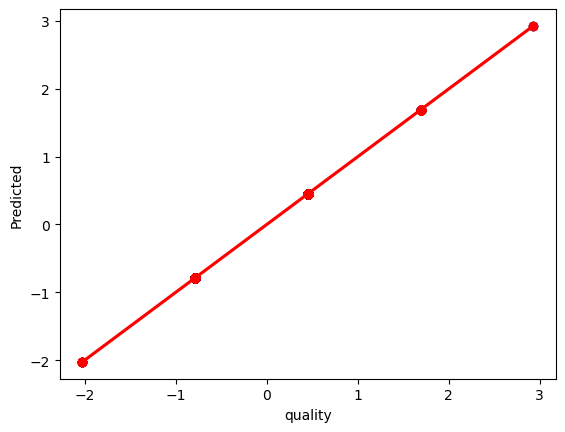

In [83]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test, y = y_pred, ci=None, color='red')

## svr

In [84]:
svr= SVR()
svr.fit(X_train,y_train)

SVR()

In [85]:
svr_pred = svr.predict(X_test)


In [86]:
Acc_svr = svr.score(X_train, y_train)
acc_svr = svr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_svr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_svr*100))

Train Accuracy : 98.53%
Test Accuracy : 98.07%


In [87]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, svr_pred))
print('r2 Score: %.2f'% r2_score(y_test, svr_pred))
a2 = r2_score(y_test, svr_pred)

Mean squared error: 0.02
r2 Score: 0.98


## KNeighborsRegressor

In [88]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [89]:
pred_neigh = neigh.predict(X_test)

In [90]:
Acc_neigh = neigh.score(X_train, y_train)
acc_neigh = neigh.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_neigh*100))
print ('Test Accuracy : {:.2f}%'.format(acc_neigh*100))

Train Accuracy : 91.51%
Test Accuracy : 88.14%


In [91]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, pred_neigh))
a3 = print('r2 Score: %.2f'% r2_score(y_test, pred_neigh))
a3 = r2_score(y_test, pred_neigh)

Mean squared error: 0.10
r2 Score: 0.88


### Gradient Boosting Regressor

In [92]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [93]:
pred_gbr = gbr.predict(X_test)

In [94]:
Acc_gbr = gbr.score(X_train, y_train)
acc_gbr = gbr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_gbr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_gbr*100))

Train Accuracy : 100.00%
Test Accuracy : 100.00%


In [95]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, pred_gbr))
print('r2 Score: %.2f'% r2_score(y_test, pred_gbr))
a4 = r2_score(y_test, pred_gbr)

Mean squared error: 0.00
r2 Score: 1.00


## decision tree regressor

In [96]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [97]:

pred_dtr = dtr.predict(X_test)

In [98]:
Acc_dtr = dtr.score(X_train, y_train)
acc_dtr = dtr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_dtr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_dtr*100))

Train Accuracy : 100.00%
Test Accuracy : 100.00%


In [99]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, pred_dtr))
print('r2 Score: %.2f'% r2_score(y_test, pred_dtr))
a5 = r2_score(y_test, pred_dtr)

Mean squared error: 0.00
r2 Score: 1.00


## random forest regressor

In [100]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
pred_rfr = rfr.predict(X_test)

In [102]:
Acc_rfr = rfr.score(X_train, y_train)
acc_rfr = rfr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_rfr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_rfr*100))

Train Accuracy : 100.00%
Test Accuracy : 100.00%


In [103]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, pred_rfr))
print('r2 Score: %.2f'% r2_score(y_test, pred_rfr))
a6 = r2_score(y_test, pred_rfr)

Mean squared error: 0.00
r2 Score: 1.00


## xg boost

In [104]:
from sklearn.datasets import fetch_openml
import xgboost as xgb
# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('r2 Score: %.2f'% r2_score(y_test, y_pred))
a7 = r2_score(y_test, y_pred)

Mean Squared Error: 9.80576678931805e-10
r2 Score: 1.00


In [105]:
Acc_xg= rfr.score(X_train, y_train)
acc_xg = rfr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_xg*100))
print ('Test Accuracy : {:.2f}%'.format(acc_xg*100))

Train Accuracy : 100.00%
Test Accuracy : 100.00%


### Lasso Regression

In [106]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Define the Lasso regression model
model = Lasso(alpha=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)
a8 = r2_score(y_test, y_pred)

Mean Squared Error: 0.008108462638743442
R2 Score: 0.9906307058461806


In [107]:
Acc_lasso= rfr.score(X_train, y_train)
acc_lasso = rfr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_lasso*100))
print ('Test Accuracy : {:.2f}%'.format(acc_lasso*100))

Train Accuracy : 100.00%
Test Accuracy : 100.00%


### Final Report

In [108]:
output = pd.DataFrame({"Model":['Linear Regression','SVR','KNeighborsRegressor',
                                'Gradient Boosting Regressor','Decision Tree Regressor',
                               'Random Forest Regressor', 'XG Boost','lasso Regression'],
                      "Test_Accuracy":[acc_reg, acc_svr, acc_neigh, acc_gbr, acc_dtr, acc_rfr, acc_xg, acc_lasso], 
                      "Train_Accuracy":[Acc_reg, Acc_svr, Acc_neigh, Acc_gbr, Acc_dtr, Acc_rfr, Acc_xg, Acc_lasso],
                      "R2 score":[a1,a2,a3,a4,a5,a6,a7,a8]})

In [109]:
output
#test_accuracy == r2 score

Model  Test_Accuracy  Train_Accuracy  R2 score
0            Linear Regression       1.000000        1.000000  1.000000
1                          SVR       0.980676        0.985311  0.980676
2          KNeighborsRegressor       0.881438        0.915130  0.881438
3  Gradient Boosting Regressor       1.000000        1.000000  1.000000
4      Decision Tree Regressor       1.000000        1.000000  1.000000
5      Random Forest Regressor       1.000000        1.000000  1.000000
6                     XG Boost       1.000000        1.000000  1.000000
7             lasso Regression       1.000000        1.000000  0.990631

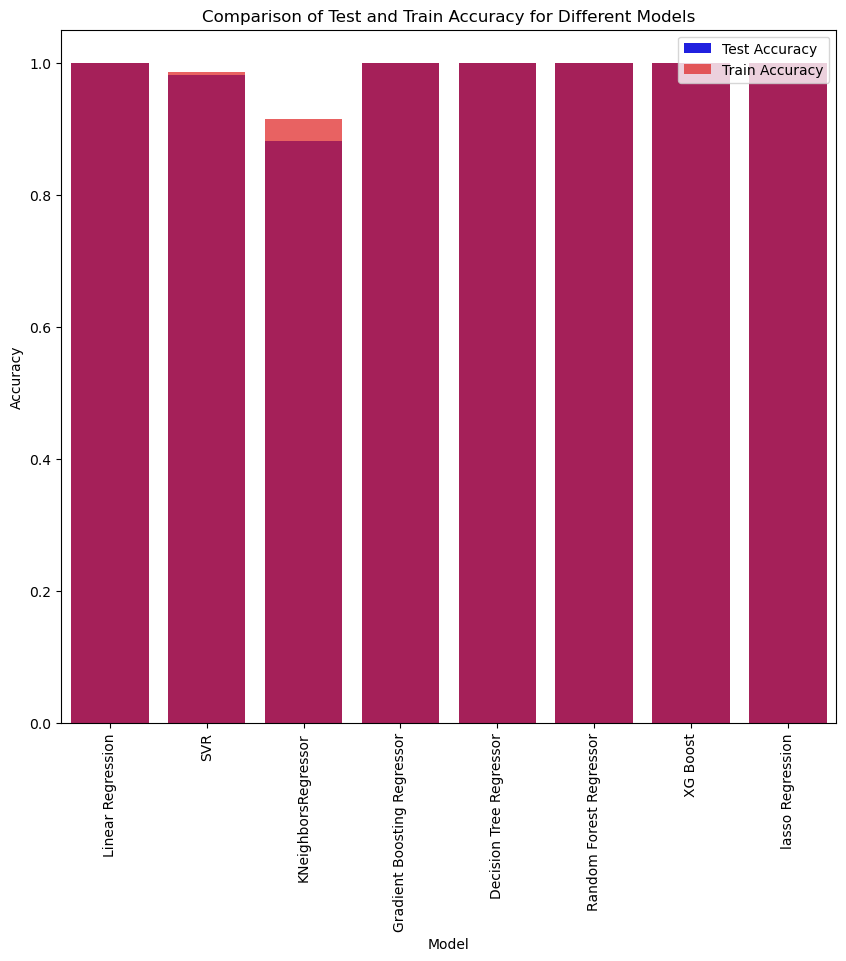

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 9))
# Assuming you have the data in a DataFrame called 'data'
sns.barplot(x='Model', y='Test_Accuracy', data=output, color='blue', label='Test Accuracy')
sns.barplot(x='Model', y='Train_Accuracy', data=output, color='red', alpha=0.7, label='Train Accuracy')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Add legend
plt.legend()


# Set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Test and Train Accuracy for Different Models')

# Display the plot
plt.show()


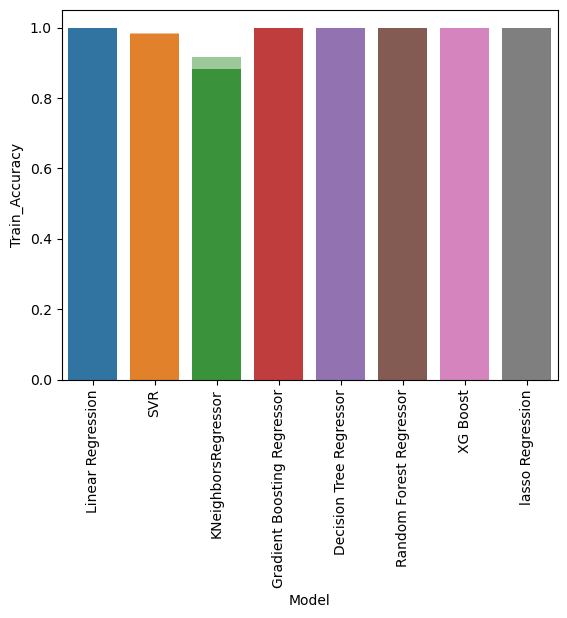

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data in a DataFrame called 'data'
sns.barplot(x='Model', y='Test_Accuracy', data=output)
sns.barplot(x='Model', y='Train_Accuracy', data=output, alpha=0.5)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Choosing Decision Tree Regressor
Decision Tree Regressor can be a suitable choice when you prioritize interpretability and want to capture non-linear patterns in your data. However, it's essential to carefully manage model complexity to prevent overfitting and to fine-tune hyperparameters to achieve the best predictive performance. Additionally, it may not always outperform more advanced ensemble methods like Gradient Boosting or XG Boost, but its simplicity and transparency make it a valuable tool in various scenarios. Model evaluation and selection should consider trade-offs between model complexity, interpretability, and predictive performance, depending on the specific problem and resources available.






### Improving Linear Regression Performance:

Feature Engineering: Carefully select and engineer relevant features that have a stronger linear relationship with the target variable.

Regularization: Use regularization techniques like Ridge or Lasso Regression to prevent overfitting and improve model generalization.

Outlier Handling: Detect and handle outliers that can adversely affect linear regression. Robust regression techniques can also be considered.

### Limitations of Linear Regression:

Linearity Assumption: Linear regression assumes a linear relationship between variables, which may not hold in all cases.

Independence Assumption: Assumes that residuals are independent, which might be violated in time-series or autocorrelated data.

Limited to Linear Relationships: Ineffective at capturing complex, non-linear relationships.
